## 0. Introduction to Python and NumPy

*Instructor:* Eva Dyer, BMED 6517

Overview:
- Python and Numpy basics
- Visualization: Matplotlib and Seaborn
- Matrix-vector operations
- Data frames, pandas
______

## 1. Python Basics

A **cell** is a container for code to be executed by the python **kernel**. When you run the cell, its output will be displayed below. You can click the run button or press `Shift+Enter`.

### 1.1 Basic variable manipulation


In [2]:
print("Hello world!")

Hello world!


The equal sign `=` is used to assign a value to a variable.

In [3]:
a = 5 ** 2  # 5 squared
print(a)

a = (a - 10) * 2
print(a)

25
30


### 1.2. `for` Statements


The `for` statement is used to iterate over the indented code.

Use `range()` to iterate over a sequence of numbers for example.
Note that `range(n)` goes from `0` to `n-1`.

In [4]:
cumsum = 0  # holds cumulative sum

for i in range(3):
  print(i)
  cumsum = cumsum + i
  print('Cumulative Sum:', cumsum)

0
Cumulative Sum: 0
1
Cumulative Sum: 1
2
Cumulative Sum: 3


### 1.3. Lists


Lists are used to group together multiple values. They might contain items of different types, but usually the items all have the same type.

`len()` is used to access the length of a list.

In [5]:
squares = [1, 4, 9, 16, 25]
print('This list has', len(squares), 'elements.')

This list has 5 elements.


To access an element in the list, use indexing. Note that the first element in a list has index `0`.

In [6]:
print('first element:', squares[0])  # indexing returns the item
print('third element:', squares[2])
print('last element:', squares[4])
print('also last element:', squares[-1])

first element: 1
third element: 9
last element: 25
also last element: 25


Lists can be sliced. `squares[a:b]` will return a new list with the elements between indices `a` and `b-1`.

In [7]:
print(squares[1:3])

[4, 9]


### 1.4. Defining functions

When certain blocks of code are to be used multiple times, defining functions can be useful. In general, it is helpful to break down the code into small an modular components.

Below is an example of a function that takes in arguments and returns a value.

In [8]:
def compute_sum(l):
    sum = 0
    for i in range(len(l)):
        sum += l[i]
    return sum

print('The sum of', squares, 'is', compute_sum(squares))

The sum of [1, 4, 9, 16, 25] is 55


### 1.5. Python Packages

Python comes with a library of standard modules, like `math` for example. The module itself, or a specific function can be loaded in.

In [9]:
import math

print(math.cos(0))

1.0


In [10]:
from math import cos, pi

print(cos(pi))

-1.0


More modules can be installed through `pip`, the package installer for Python. We can install the `art` for example and then load it in to make cool ASCII art.

In [11]:
!pip install art #<- note that ! lets us run a bash command

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.8/599.8 kB 4.7 MB/s eta 0:00:00


In [12]:
from art import tprint, art

# print pretty text
tprint("\(^-^)/")

__      __ /\         /\ __      __
\ \    / /|/\|       |/\|\ \    / /
 \ \  | |      _____      | |  / / 
  \ \ | |     |_____|     | | / /  
   \_\| |                 | |/_/   
       \_\               /_/       



In [13]:
# draw 3 random Strings. (Hint: try running the cell multiple times.)
for i in range(3):
    print(art("random"))

~(__^>
/"\
@(o),(o)


### 1.6. Example: Creating a matrix

A list can contain any type of object, that includes lists themselves. These are called nested lists. Let's create a 3x4 matrix.

In [14]:
matrix = [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

print('first row:', matrix[0])
print('element at row 0 and column 2:', matrix[0][2])

first row: [0, 0, 0, 0]
element at row 0 and column 2: 0


Let's add 1s to the main diagonal of the matrix.

In [15]:
for i in range(3):
    for j in range(4):
        if i == j:
            matrix[i][j] = 1

print(matrix)

[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0]]


### 1.7. More resources:
- https://docs.python.org/3/tutorial/introduction.html
- https://docs.python.org/3/tutorial/

## 2. Numpy Basics and Arrays


### 2.1. Matrices (Numpy arrays)
- A Numpy array is the Python data type for storing/manipulating multi-dimensional matrices.
​
- Matrices are an extreme example of structured data. Data is accessed by providing indices for each dimension. Indices must be integers, and all data must be numerical.

- Matrices do not have a built-in schema system, so it must be managed separately. We will briefly explore how to work with matrices in Python and how to use them for data storage.

In [16]:
import numpy as np  # <- very common shorthand for numpy

### 2.2. Creating `numpy` arrays

There are a number of ways to initialize new numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.
* reading data from files

In [17]:
# a vector: the argument to the array function is a Python list
v = np.array([1,2,3,4])

print(v)

[1 2 3 4]


In [18]:
# a matrix: the argument to the array function is a nested Python list
M = np.array([[1, 2], [3, 4]])

print(M)

[[1 2]
 [3 4]]


The difference between the `v` and `M` arrays is only their shapes. We can get information about the shape and size of an array by using the `shape` and `size` properties.

In [19]:
print('v: number of dimensions=', v.ndim, ', shape=', v.shape)
print('M: number of dimensions=', M.ndim, ', shape=', M.shape)

v: number of dimensions= 1 , shape= (4,)
M: number of dimensions= 2 , shape= (2, 2)


Arrays are similar to lists, but they must contain a single type:

In [20]:
M[0,0] = 10
print(M)

[[10  2]
 [ 3  4]]


If we want, we can explicitly define the type of the array data when we create it, using the `dtype` keyword argument:

In [21]:
v = np.array([1, 2, 3, 4], dtype=np.uint8)
print(v, v.dtype)

v = np.array([1, 2, 3, 4], dtype=np.float)
print(v, v.dtype)

[1 2 3 4] uint8
[1. 2. 3. 4.] float64


<ipython-input-21-90ebef2c1699>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  v = np.array([1, 2, 3, 4], dtype=np.float)


### 2.3. Creating arrays with functions

It is often more efficient to generate large arrays instead of creating them from lists. There are a few useful functions for this in numpy.

`np.arange` creates a range with a specified step size (endpoints not included)

In [22]:
x = np.arange(0, 4, 0.5) # arguments: start, stop, step
print(x)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5]


`np.linspace` creates a range with a specified number of points (endpoints are included)

In [23]:
x = np.linspace(0,10,5)
print(x)

[ 0.   2.5  5.   7.5 10. ]


`np.zeros` creates a matrix of zeros.

`np.ones` creates a matrix of ones.

`np.eye` creates an identity matrix.


In [24]:
print('\n 2d-Matrix of shape (2,3) filled with zeros\n', np.zeros((2,3)))
print('\n 3d-Matrix of shape (2,2,2) filled with ones\n', np.ones((2, 3, 4)))
print('\n Identity matrix of shape (3,3)\n', np.eye(3))


 2d-Matrix of shape (2,3) filled with zeros
 [[0. 0. 0.]
 [0. 0. 0.]]

 3d-Matrix of shape (2,2,2) filled with ones
 [[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]

 Identity matrix of shape (3,3)
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### 2.4. Manipulating arrays

Once we generate `numpy` arrays, we need to interact with them. This involves a few operations:

* indexing - accessing certain elements
* index "slicing" - accessing certain subsets of elements
* fancy indexing - combinations of indexing and slicing

This is not very different from Matlab.

We can index elements in an array using square brackets and indices:

In [25]:
# v is a vector, and has only one dimension, taking one index
print(v[0])
# M is a matrix, or a 2 dimensional array, taking two indices
print(M[1,1])
# If an index is ommitted then the whole row is returned
print(M[1])

1.0
4
[3 4]


We can assign new values to elements or rows in an array using **indexing**:

In [26]:
M[:,1] = -1
print(M)

[[10 -1]
 [ 3 -1]]


**Index slicing** is the name for the syntax `M[lower:upper]` to extract a subset of an array:

In [27]:
A = np.arange(1,20)
print(A)
print(A[1:8])

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[2 3 4 5 6 7 8]


**Fancy indexing** is the name for when an array or list is used in-place of an index:

In [28]:
R = np.eye(4)
print(R, '\n')

row_indices = np.array([1, 3])
print(R[row_indices])

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] 

[[0. 1. 0. 0.]
 [0. 0. 0. 1.]]


### 2.5. Transposing arrays

Arrays can easily be transposed with `.T`.

In [29]:
M = np.array([[1,2,3], [2,1,4]])
print(M)
print('shape', M.shape)

print('\n')

print(M.T)
print('shape', M.T.shape)

[[1 2 3]
 [2 1 4]]
shape (2, 3)


[[1 2]
 [2 1]
 [3 4]]
shape (3, 2)


### 2.6. Computing statistics


Mean:
$\mu = E [ X ] $

Variance:
$\sigma^2 = E [  ( X - \mu )^2  ] = E [ X^2] - (E[X])^2 $


In [30]:
v = np.array([1, 2, 0, 4, 10, 8])

print('max:', np.max(v))
print('sum:', np.sum(v))
print('mean:', np.mean(v))
print('standard deviation:', np.std(v))

max: 10
sum: 25
mean: 4.166666666666667
standard deviation: 3.6704525909242065


### 2.7. Example: Computing the L2 distance between two vectors


In [31]:
v = np.array([1, 2, 0, 4, 10, 8])
w = np.array([2, 1, 2, 7, 8, 9])

dist = np.sqrt(np.sum((v - w)**2))
print(dist)


4.47213595499958


**Challenge:**  What is the L1-distance between v and w?

In [32]:
# Add code to compute the L1 distance - Are there other functions that can compute general Lp-norms?

### 2.8. Example: Computing powers of 2


In [33]:
pow_two = 2 ** np.arange(4, 12)
print(pow_two)

[  16   32   64  128  256  512 1024 2048]


### More resources
- https://numpy.org/doc/stable/user/absolute_beginners.html

## 3. Matrix-Vector Operations

You should already be famililar with linear algebra, but we will briefly review the basics and show how it works in `numpy` by covering the following:

Formulating your code as matrix-matrix and matrix-vector operations in Numpy will make it much more efficient. We will briefly cover syntax for:

* scalar*vector
* scalar*matrix
* matrix*vector
* matrix*matrix
* inverse
* eigendecomposition

`numpy` notes:

* reshaping and resizing arrays
* boolean and comparison operators on arrays

### 3.1. Scalar-array operations

We can use the usual arithmetic operators to multiply, add, subtract, and divide arrays with scalar numbers.

In [34]:
v = np.arange(0, 5)
print('v:', v)

print('v*2:', v*2)

print('v+2:', v+2)

v: [0 1 2 3 4]
v*2: [0 2 4 6 8]
v+2: [2 3 4 5 6]


In [35]:
M = np.ones((2,2))
print('M:\n', M)
print('M*2:\n', M*2)
print('M+2:\n', M+2)

M:
 [[1. 1.]
 [1. 1.]]
M*2:
 [[2. 2.]
 [2. 2.]]
M+2:
 [[3. 3.]
 [3. 3.]]


### 3.2. Element-wise array-array operations

When we add, subtract, multiply and divide arrays with each other, the default behaviour is **element-wise** operations. This is different from Matlab!

In [36]:
v = np.arange(2,6)
print('v:', v)
print('v.v:', v*v)
print('v/v:', v/v)

M = np.array([[1,2],[3,4]])
print('M:\n', M)
print('M.M:\n', M*M)

v: [2 3 4 5]
v.v: [ 4  9 16 25]
v/v: [1. 1. 1. 1.]
M:
 [[1 2]
 [3 4]]
M.M:
 [[ 1  4]
 [ 9 16]]


### 3.3. Matrix algebra

What about matrix mutiplication?

* use the `dot` function

In [37]:
A = np.eye(3,3)
v = np.array([1,2,3])

print('A:\n', A)
print('v:', v)

print('A*v.T:', np.dot(A, v.T))
print('A*A:\n', np.dot(A,A))
print('v*v:', np.dot(v.T,v))

A:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
v: [1 2 3]
A*v.T: [1. 2. 3.]
A*A:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
v*v: 14


### 3.4. Common matrix operations

We can easily calculate the inverse using `inv`

In [38]:
A = np.array([[-1, 2], [3, -1]])
print('A:\n', A)
print('inv(A):\n', np.linalg.inv(A))

A:
 [[-1  2]
 [ 3 -1]]
inv(A):
 [[0.2 0.4]
 [0.6 0.2]]


## 4. Visualization with matplotlib

Matplotlib is a library for making 2D plots in Python. It offers several kinds of plots. Here we highlight some of the most commonly used plots.

In [39]:
import matplotlib.pyplot as plt

### 4.1. Line plot

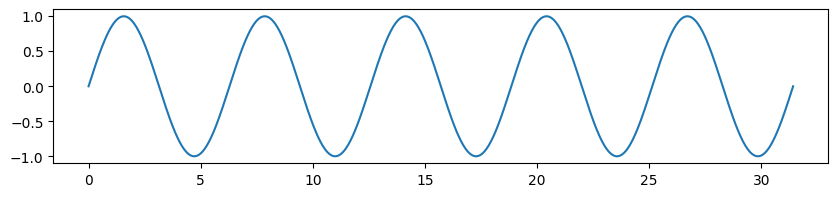

In [40]:
X = np.linspace(0, 10*np.pi, 1000)
Y = np.sin(X)

plt.figure(figsize=(10, 2))
plt.plot(X,Y)
plt.show()

Spend a few moments thinking about different functions that you could generate (linear? exponential?) in the cell below.

Check out these examples:
https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

In [41]:
# Plot different functions using subplots


You can plot several data on the same figure. Make sure to add a legend!

In [42]:
X = np.linspace(0, 10*np.pi, 1000)
Y1 = np.sin(X)
Y2 = np.cos(X)

plt.figure(figsize=(10, 2))
plt.plot(X,Y1)
plt.plot(X,Y2)
plt.legend(['Sin', 'Cos'])
plt.show()

### 4.2. Labeling a figure

Making a nice figure is awesome, but without labels, your readers cannot appreciate it.

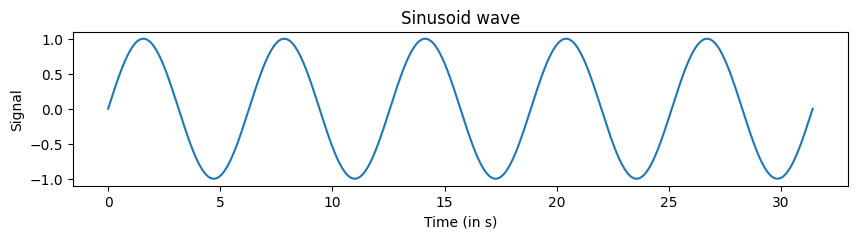

In [43]:
plt.figure(figsize=(10, 2))
plt.plot(X,Y)
plt.title("Sinusoid wave")
plt.ylabel("Signal")
plt.xlabel("Time (in s)")
plt.show()

### 4.3. Scatter plot

In [44]:
X = np.random.uniform(0, 1, 100)
Y = np.random.uniform(0, 1, 100)
plt.scatter(X,Y)
plt.show()

We can add color to a scatter plot

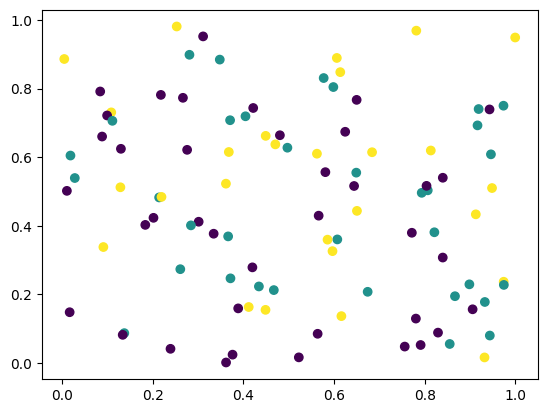

In [45]:
X = np.random.uniform(0, 1, 100)
Y = np.random.uniform(0, 1, 100)
color = np.random.randint(0, 3, 100)
plt.scatter(X,Y, c=color)
plt.show()

### 4.4. Bar plot

In [67]:
X = np.arange(20)
Y = np.random.uniform(0, 1, 20)
plt.figure(figsize=(7, 1))
plt.bar(X, Y)
plt.show()

### 4.5. Matrix visualization

#### 4.5.1 Uniform distribution

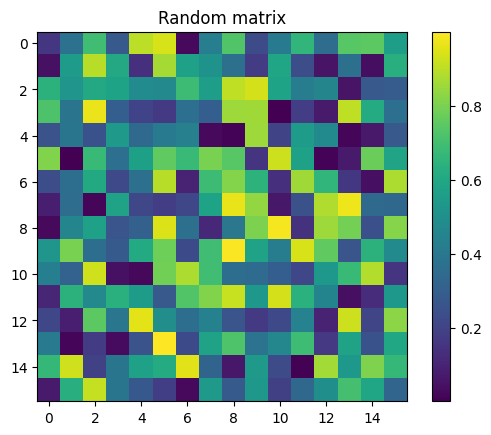

In [47]:
Z = np.random.uniform(0, 1, (16, 16))
plt.imshow(Z)
plt.title('Random matrix')
plt.colorbar()
plt.show()

Note how element `(0, 0)` appears at the top-left of the figure.

**Challenge:**   
What are other distributions that you can generate? Check out the documentation for `np.random` and detail other random variables that you can generate through numpy and other packages.

In [48]:
# add code here

#### 4.5.2. Poisson distribution

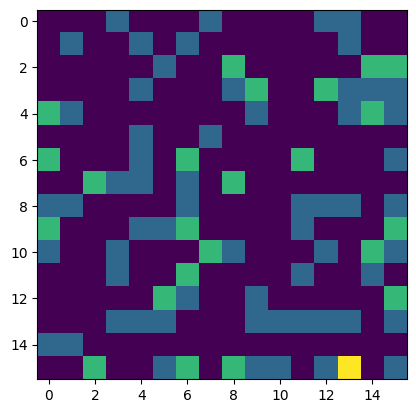

In [49]:
Z = np.random.poisson(0.5, (16,16))
plt.imshow(Z)

In [50]:
# Let's take a moment to plot the distribution as a histogram
# add code here:


**Challenge:**
- Create a 20x20 array that has a white vertical bar (5 pixels wide) on a black background with additive Gaussian noise. Plot the output and include the code below.
- Create code to generate an image array (user specified size) that has rotated white bar (of a user specified angle), with additive poisson noise of user specified noise intensity parameter. Use this code to generate multiple example images and then plot them as subfigures.

In [51]:
# add code here

#### 4.5.3. Identity Matrix

In [52]:
Z = np.eye(16)

plt.imshow(Z)
plt.title('Identity matrix')
plt.colorbar()
plt.show()

### 4.6. Visualizing images



In [53]:
# Loading a sample image
import matplotlib.cbook as cbook

w, h = 256, 256
with cbook.get_sample_data('s1045.ima.gz') as datafile:
    s = datafile.read()
img = np.frombuffer(s, np.uint16).astype(float).reshape((w, h))

print(img)
print('type:', img.dtype)
print('shape:', img.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
type: float64
shape: (256, 256)


In [54]:
plt.imshow(img, cmap=plt.cm.jet)
plt.title('MRI')
plt.show()

### 4.7. Visualizing dataframes using Seaborn

Seaborn provides a high-level interface for drawing attractive and informative statistical graphics. It is based on matplotlib.

Let's use it to visualize a widely used built in dataset consisting of different features and attributes collected from three different types of penguins (Adelie, Chinstrap, Gentoo).

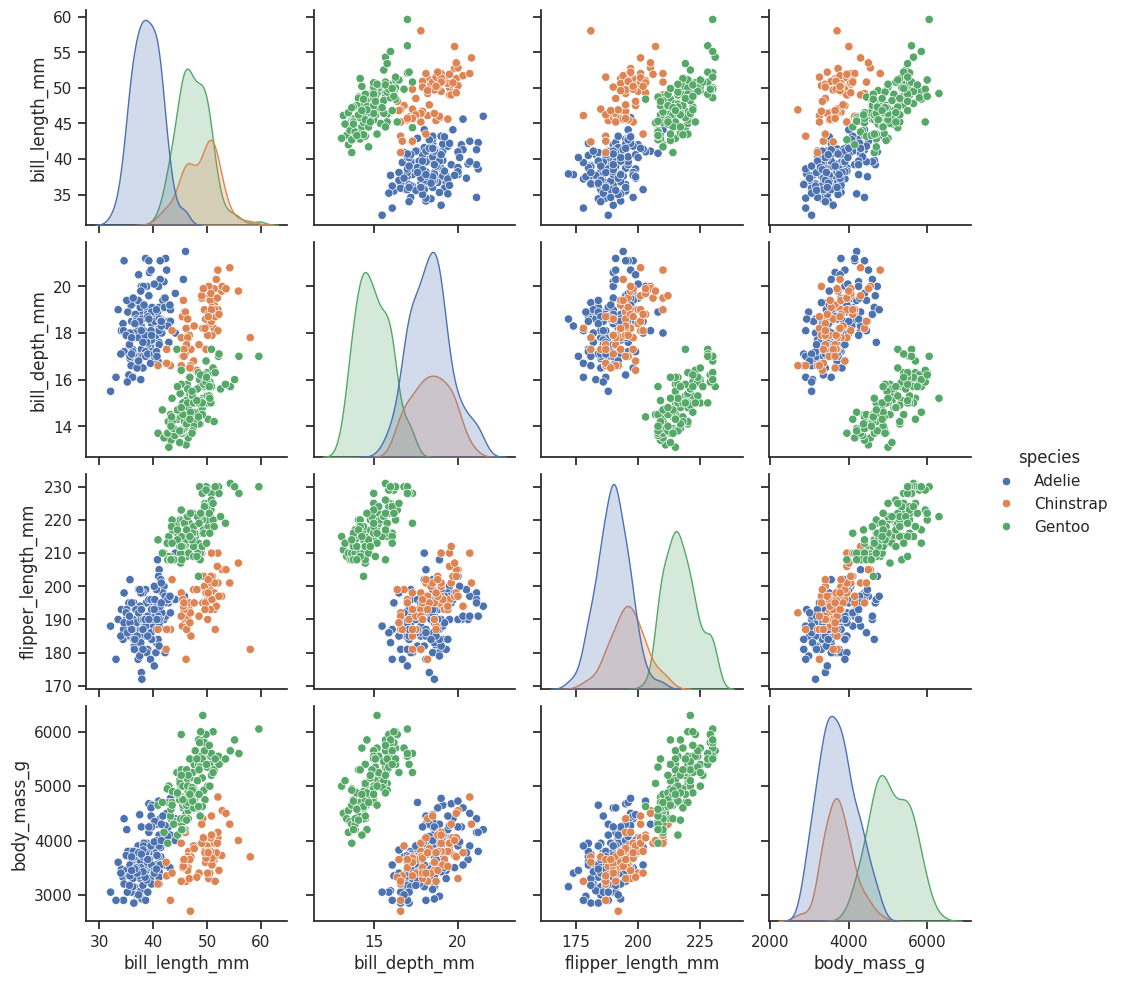

In [55]:
import seaborn as sns
sns.set_theme(style="ticks")

df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")
plt.show()

In [56]:
df.head(10)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   
6  Adelie  Torgersen            38.9           17.8              181.0   
7  Adelie  Torgersen            39.2           19.6              195.0   
8  Adelie  Torgersen            34.1           18.1              193.0   
9  Adelie  Torgersen            42.0           20.2              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
5       3650.0    Male  
6       3625.0  Female  
7       4675.0    Male  
8       3475.0     NaN  
9       4250.0     NaN

### 4.8. More resources
- matplotlib cheatsheets: https://github.com/matplotlib/cheatsheets#cheatsheets
- matplotlib gallery: https://matplotlib.org/stable/gallery/index.html
- seaborn gallery: https://seaborn.pydata.org/examples/index.html

## 5. Pandas for table manipulation

pandas is a library for manipulating numerical tables and time series, and is a powerful tool for data analysis.

pandas dataframes are a very convenient way to interact with low-dimensional structured data. The basic dataframe object acts very similarly to an Excel file, but data can be manipulated with Python rather than clumsy Excel functions.

In [57]:
import pandas as pd

### 5.1. Loading data

Load in the iris dataset!

**3 classes**:  Three different types of iris flowers, Iris Setosa, Iris Versicolor, and Iris Virginica.

**4 features**: Petal length and width, Sepal length and width

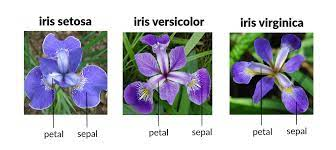

In [58]:
df = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")

In [59]:
df.head(20)

sepal.length  sepal.width  petal.length  petal.width variety
0            5.1          3.5           1.4          0.2  Setosa
1            4.9          3.0           1.4          0.2  Setosa
2            4.7          3.2           1.3          0.2  Setosa
3            4.6          3.1           1.5          0.2  Setosa
4            5.0          3.6           1.4          0.2  Setosa
5            5.4          3.9           1.7          0.4  Setosa
6            4.6          3.4           1.4          0.3  Setosa
7            5.0          3.4           1.5          0.2  Setosa
8            4.4          2.9           1.4          0.2  Setosa
9            4.9          3.1           1.5          0.1  Setosa
10           5.4          3.7           1.5          0.2  Setosa
11           4.8          3.4           1.6          0.2  Setosa
12           4.8          3.0           1.4          0.1  Setosa
13           4.3          3.0           1.1          0.1  Setosa
14           5.8          4.0           1.2          0.2  Setosa
15           5.7          4.4           1.5          0.4  Setosa
16           5.4          3.9           1.3          0.4  Setosa
17           5.1          3.5           1.4          0.3  Setosa
18           5.7          3.8           1.7          0.3  Setosa
19           5.1          3.8           1.5          0.3  Setosa

### 5.2. Computing statistics

In [60]:
df['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [61]:
df.describe()

sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

### 5.3. More visualization

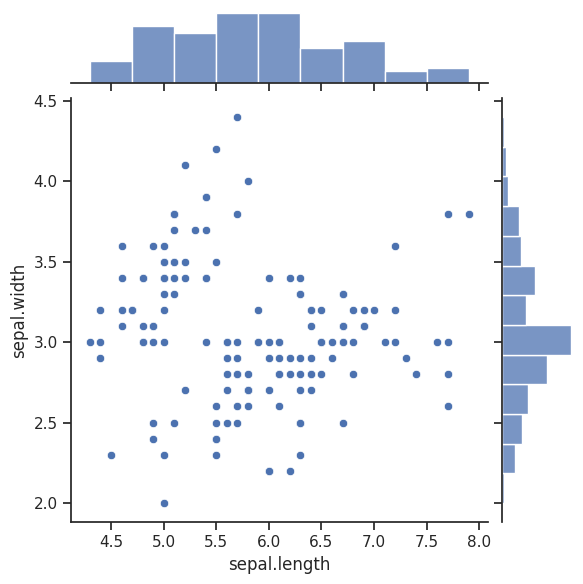

In [62]:
sns.jointplot(x='sepal.length', y='sepal.width', data=df, height=6)
plt.show()

### 5.4. Computing new features

Because Pandas is designed to work with NumPy, most NumPy functions will work on DataFrame objects.

In [63]:
df['length_diff'] = df['sepal.length'] - df['petal.length']
print(df.head())

   sepal.length  sepal.width  petal.length  petal.width variety  length_diff
0           5.1          3.5           1.4          0.2  Setosa          3.7
1           4.9          3.0           1.4          0.2  Setosa          3.5
2           4.7          3.2           1.3          0.2  Setosa          3.4
3           4.6          3.1           1.5          0.2  Setosa          3.1
4           5.0          3.6           1.4          0.2  Setosa          3.6


### 5.5. More resources
- pandas cheatsheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

**Challenge:**

- Load a data spreadsheet (CSV) of your choice loaded into Colab. Visualize the spreadsheet entries and metadata with Pandas.

- Generate a pairplot across some set of features in your dataset.

- Load three images into Colab that represent your interests. Crop and rescale them to all be of equal size, and visualize them as subplots using matplotlib.

In [64]:
# Please add code here

*Contributors*: Mehdi Azabou (mazabou{at}gatech.edu), Eva Dyer (evadyer{at}gatech.edu)